# Imports

In [1]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
colors = px.colors.qualitative.Plotly

In [3]:
# Create plot layout
layout = go.Layout(
    width=1000,
    height=500,
    template="plotly_white",
    font=dict(
        color="black",
        size=24,
        family="Arial",
    ),
)

# Read files

In [4]:
df = pd.read_excel("../data/06_model_output/output_keywording.xlsx")
df

,entry,database,title,abstract,author_keywords,authors,authors_affiliations,publication_year,source_title,publisher,...,RQ1_PubYear,RQ1_EstimatedPubDate,RQ2_ResearchType,RQ3_ResearchMethod,RQ4_OrganizationType,RQ5_SubtopicsAM,RQ6_SubtopicsDS,RQ7_ProblemsReported,RQ8_ObjectiveAM,RQ9_ContributionsResults
0,6,acm,A Scalable Methodology to Guide Student Teams ...,This article reports on a sequential mixed-met...,"project methodologies, Project-based learning,...","Saltz JS,Heckman RR",NaN,2018.0,ACM Trans. Comput. Educ.,Association for Computing Machinery,...,2018,2018-07-11,Validação,MixedMethods,Academia,Kanban,CicloDesenvolvimento;Geral,Time;Integração;Definição;Incerteza,Definição,Coordenação;Clareza
1,14,ieeex,Achieving Agile Big Data Science: The Evolutio...,While there has been a rapid increase in the u...,Big Data Science;Agile;Process Methodology,J. S. Saltz; I. Shamshurin,School of Information Studies Syracuse Univers...,2019.0,2019 IEEE International Conference on Big Data...,IEEE,...,2019,2019-12-12,Avaliação,Etnografia,Industria,Kanban,BigData,Time;Integração;Incerteza,Agilidade;Integração,Coordenação;Priorização;Eficiência;WIP
2,15,ieeex,SKI: An Agile Framework for Data Science,This paper explores data science project manag...,Data Science;Big Data;Agile;Process Methodology,J. Saltz; A. Suthrland,Syracuse University; Scrum Inc.,2019.0,2019 IEEE International Conference on Big Data...,IEEE,...,2019,2019-12-12,Validação,StudyCase,Academia,Adaptada,CicloDesenvolvimento;Geral,Incerteza;Suporte;Experiência,Definição,Clareza;Divisão;Coordenação
3,18,ieeex,Identifying the most Common Frameworks Data Sc...,This paper presents the results of a study foc...,Data Science;Big Data;Process Methodology,J. S. Saltz; N. Hotz,Syracuse University; Indiana University,2020.0,2020 IEEE International Conference on Big Data...,IEEE,...,2020,2020-12-13,Avaliação,Survey,Industria,Geral,CicloDesenvolvimento;Geral,Definição,NaN,NaN
4,20,ieeex,Applying Scrum in Data Science Projects,The rise of big data has led to an increase in...,Data Science;Agile;Scrum,J. Baijens; R. Helms; D. Iren,"Department of Information Science, Open Univer...",2020.0,2020 IEEE 22nd Conference on Business Informat...,IEEE,...,2020,2020-06-24,Avaliação,Interview,Industria,Adaptada,CicloDesenvolvimento;Geral,Incerteza;Definição,Agilidade;Definição,Clareza;Coordenação;Priorização
5,21,ieeex,Managing and Composing Teams in Data Science: ...,Data science projects have become commonplace ...,Data science;agile practices;teamwork;project ...,T. Aho; T. Kilamo; L. Lwakatare; T. Mikkonen; ...,"TietoEvry, Tampere, Finland; Computing Science...",2021.0,2021 IEEE International Conference on Big Data...,IEEE,...,2021,2021-12-18,Avaliação,Survey,Organizações,Geral,BigData,Incerteza,NaN,NaN
6,22,ieeex,Using Agile Frameworks in Big Data projects,Considering the main problems of Big Data proj...,Agile;project management;Big Data;statistics;q...,K. Kolesnikova; O. Mezentseva; O. Kolesnikov; ...,"Taras Shevchenko National University of Kyiv, ...",2021.0,2021 IEEE 16th International Conference on Com...,IEEE,...,2021,2021-09-25,Avaliação,Survey,Industria,Geral,BigData,Escolha;Suporte;Experiência,Agilidade;Integração,Eficiência
7,24,ieeex,Story and Task Issue Analysis for Agile Machin...,The usage of Agile methodology in planning and...,scrum;machine learning project;software engine...,K. Singla; T. M. Vinayak; A. S. Arpitha; C. Na...,"Samsung R&D Institute, Bangalore, India; Samsu...",2020.0,2020 IEEE-HYDCON,IEEE,...,2020,2020-09-11,Avaliação,FieldStudy,Industria,Scrum,ML,Especificidades,Agilidade,NaN
8,28,ieeex,"CRISP-DM for Data Science: Strengths, Weakness...",This paper explores the strengths and weakness...,NaN,J. S. Saltz,Syracuse University,2021.0,2021 IEEE International Conference on Big Data...,IEEE,...,2021,2021-12-18,Solução,Proposta,Geral,Adaptada,CicloDesenvolvimento;Geral,Time;Integração;Definição,Definição;Integração,NaN
9,29,ieeex,Identifying and Addressing 6 Key Questions

In [5]:
df.columns

Index(['entry', 'database', 'title', 'abstract', 'author_keywords', 'authors',
       'authors_affiliations', 'publication_year', 'source_title', 'publisher',
       'doi', 'query_date', 'processing_date', 'duplicated_exclusion_flag',
       'duplicated_validation_date', 'metadata_exclusion_flag',
       'metadata_exclusion_criteria', 'metadata_validation_date',
       'fulltext_exclusion_flag', 'fulltext_exclusion_criteria',
       'fulltext_validation_date', 'exclusion_step', 'exclusion_criteria',
       'exclusion_date', 'RQ0_Authors', 'RQ0_Countries', 'RQ0_ScopusCitations',
       'RQ0_FWCI', 'RQ0_Keywords', 'RQ1_PubSourceType',
       'RQ1_MacroPubSourceType', 'RQ1_PubSourceName', 'RQ1_ShortPubSourceName',
       'RQ1_PubYear', 'RQ1_EstimatedPubDate', 'RQ2_ResearchType',
       'RQ3_ResearchMethod', 'RQ4_OrganizationType', 'RQ5_SubtopicsAM',
       'RQ6_SubtopicsDS', 'RQ7_ProblemsReported', 'RQ8_ObjectiveAM',
       'RQ9_ContributionsResults'],
      dtype='object')

# RQ7-RQ8-RQ9

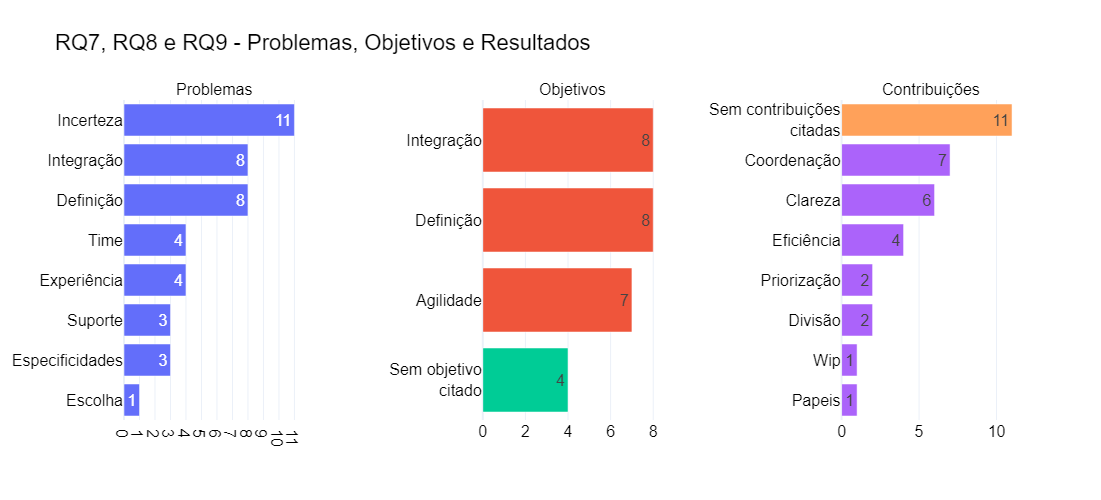

In [9]:
bar_rq7_rq8_rq9 = make_subplots(rows=1, cols=3, horizontal_spacing = 0.20, subplot_titles=['Problemas', 'Objetivos', 'Contribuições'])

df_results = df.copy()

df_rq7 = df.copy()
df_rq7 = df_rq7.set_index("entry")
df_rq7 = df_rq7["RQ7_ProblemsReported"].str.split(";", expand = True)
df_rq7 = pd.melt(df_rq7.reset_index(), id_vars = "entry", value_vars = [col for col in df_rq7.columns if col != "entry"])
df_rq7 = df_rq7.dropna()
df_rq7 = df_rq7[["entry", "value"]]
df_rq7["value"] = df_rq7["value"].str.replace(" ", "_").str.lower().str.capitalize()
df_rq7 = df_rq7.groupby("value")["entry"].count().sort_values()

df_rq8 = df.copy()
df_rq8 = df_rq8.set_index("entry")
df_rq8["RQ8_ObjectiveAM"] = df_rq8["RQ8_ObjectiveAM"].fillna("Sem objetivo citado")
df_rq8 = df_rq8["RQ8_ObjectiveAM"].str.split(";", expand = True)
df_rq8 = pd.melt(df_rq8.reset_index(), id_vars = "entry", value_vars = [col for col in df_rq8.columns if col != "entry"])
df_rq8 = df_rq8.dropna()
df_rq8 = df_rq8[["entry", "value"]]
df_rq8["value"] = df_rq8["value"].str.replace(" ", "_").str.lower().str.capitalize()
df_rq8 = df_rq8.replace("Sem_objetivo_citado", "Sem objetivo<br>citado")
df_rq8 = df_rq8.groupby("value")["entry"].count().sort_values()


df_rq9 = df.copy()
df_rq9 = df_rq9.set_index("entry")
df_rq9["RQ9_ContributionsResults"] = df_rq9["RQ9_ContributionsResults"].fillna("Sem contribuições citadas")
df_rq9 = df_rq9["RQ9_ContributionsResults"].str.split(";", expand = True)
df_rq9 = pd.melt(df_rq9.reset_index(), id_vars = "entry", value_vars = [col for col in df_rq9.columns if col != "entry"])
df_rq9 = df_rq9.dropna()
df_rq9 = df_rq9[["entry", "value"]]
df_rq9["value"] = df_rq9["value"].str.replace(" ", "_").str.lower().str.capitalize()
df_rq9 = df_rq9.replace("Sem_contribuições_citadas", "Sem contribuições<br>citadas")
df_rq9 = df_rq9.groupby("value")["entry"].count().sort_values()


bar_rq7_rq8_rq9.add_trace(
    go.Bar(
        y=df_rq7.index, 
        x=df_rq7, 
        name = "Problemas",
        showlegend=False,
        orientation = "h",
        textposition='auto',
        text=df_rq7
    ), 
    row=1, col=1
)

bar_rq7_rq8_rq9.add_trace(
    go.Bar(
        y=df_rq8.index, 
        x=df_rq8, 
        name = "Objetivos",
        showlegend=False,
        orientation = "h",
        textposition='auto',
        text=df_rq8,
        marker_color = [colors[1] if ind != "Sem objetivo<br>citado" else colors[2] for ind in df_rq8.index]
    ), 
    row=1, col=2
)

bar_rq7_rq8_rq9.add_trace(
    go.Bar(
        y=df_rq9.index, 
        x=df_rq9, 
        name = "Contribuições",
        showlegend=False,
        orientation = "h",
        textposition='auto',
        text=df_rq9,
        marker_color = [colors[3] if ind != "Sem contribuições<br>citadas" else colors[4] for ind in df_rq9.index]
    ), 
    row=1, col=3
)


bar_rq7_rq8_rq9.update_layout(
    width=1000,
    height=500,
    template="plotly_white",
    font=dict(
        color="black",
        size=16,  # can change the size of font here
        family="Arial",
    ),
    xaxis=dict(
        tickmode='linear'
    ),
    title = "RQ7, RQ8 e RQ9 - Problemas, Objetivos e Resultados",
)
bar_rq7_rq8_rq9.show()

# RQ8 E RQ9 - DISTRIBUIÇÕES

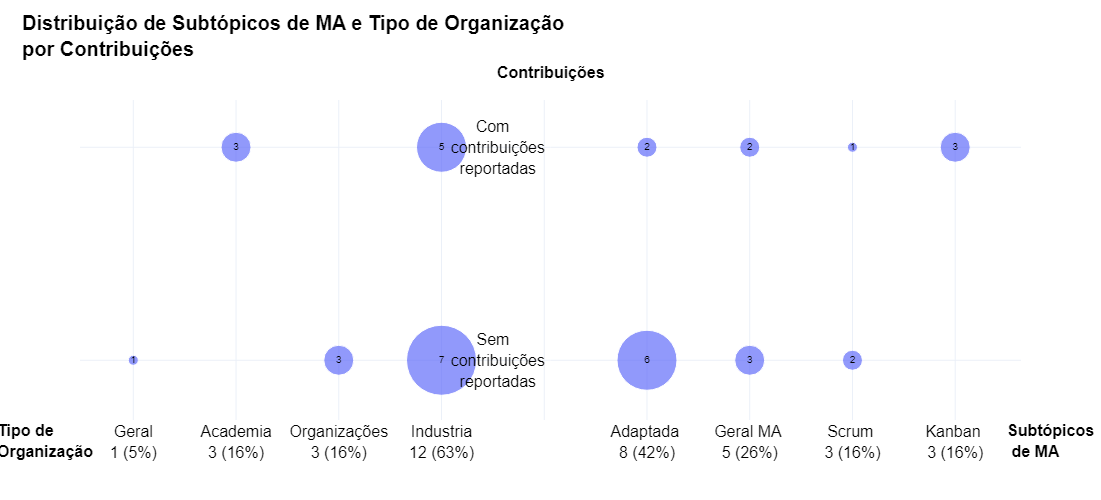

In [20]:
df_metodos = df.copy()

df_metodos["RQ8_ObjectiveAM_BOOL"] = np.where(df_metodos["RQ8_ObjectiveAM"].isna(), "Sem objetivo<br>definido", "Com objetivo<br>definido")
df_metodos["RQ9_ContributionsResults_BOOL"] = np.where(df_metodos["RQ9_ContributionsResults"].isna(), "Sem contribuições<br>reportadas", "Com contribuições<br>reportadas")


df_metodos

pubs_rq4_rq9 = df_metodos.groupby(["RQ4_OrganizationType", "RQ9_ContributionsResults_BOOL"])["title"].count().reset_index()
pubs_rq4_rq9.columns = ["eixo_x", "eixo_y", "size"]

pubs_rq5_rq9 = df_metodos.groupby(["RQ5_SubtopicsAM", "RQ9_ContributionsResults_BOOL"])["title"].count().reset_index()
pubs_rq5_rq9.columns = ["eixo_x", "eixo_y", "size"]
pubs_rq5_rq9["eixo_x"] = pubs_rq5_rq9["eixo_x"].replace("Geral", "Geral MA")

blank_space = pd.DataFrame(columns = pubs_rq5_rq9.columns)
blank_space["eixo_y"] = list(pubs_rq5_rq9["eixo_y"].unique())
blank_space["eixo_x"] = blank_space["eixo_x"].fillna("")
blank_space["size"] = blank_space["size"].fillna(0)

pubs_rq5_rq4_rq9 = pd.concat([pubs_rq4_rq9, blank_space, pubs_rq5_rq9], ignore_index = True)

replace_dict = {
    "Industria": "Industria<br>12 (63%)", 
    "Organizações": "Organizações<br>3 (16%)", 
    "Academia": "Academia<br>3 (16%)", 
    "Geral": "Geral<br>1 (5%)",
    "Kanban": "Kanban <br>3 (16%)",
    "Scrum": "Scrum <br>3 (16%)",
    "Geral MA": "Geral MA <br>5 (26%)",
    "Adaptada": "Adaptada <br>8 (42%)",
    "Sem contribuições<br>reportadas":"Sem        <br>contribuições<br>reportadas  ",
    "Com contribuições<br>reportadas":"Com        <br>contribuições<br>reportadas  ",
}

for key in replace_dict:
    pubs_rq5_rq4_rq9 = pubs_rq5_rq4_rq9.replace(key, replace_dict[key])


fig_pub_topics =  go.Figure(
    data=[
        go.Scatter(
            x=pubs_rq5_rq4_rq9["eixo_x"], 
            y=pubs_rq5_rq4_rq9["eixo_y"], 
            marker_size=10*pubs_rq5_rq4_rq9['size'],
            mode='markers+text',
            text = [x if x != 0 else "" for x in pubs_rq5_rq4_rq9['size'] ],
            textposition='middle center'
        )], 
    layout=layout
)

fig_pub_topics.update_yaxes(
    categoryorder='array', 
    categoryarray= [
        "Sem        <br>contribuições<br>reportadas  ", "Com        <br>contribuições<br>reportadas  "
    ]
)

fig_pub_topics.update_xaxes(
    categoryorder='array', 
    categoryarray= [
        "Geral<br>1 (5%)", "Academia<br>3 (16%)", "Organizações<br>3 (16%)", "Industria<br>12 (63%)",
        "",
         "Adaptada <br>8 (42%)", "Geral MA <br>5 (26%)", "Scrum <br>3 (16%)", "Kanban <br>3 (16%)", 
    ]
)

fig_pub_topics.update_layout(
    yaxis=dict(
        anchor="free",
        overlaying="y",
        autoshift=True,
        shift=465,
        constraintoward = "center",
        tickfont = dict(size = 16),
    ),
    font=dict(
        color="black",
        size=10,
        family="Arial",
    ),
    xaxis = dict(tickfont = dict(size = 16)),
    title = dict(
        text = "<b>Distribuição de Subtópicos de MA e Tipo de Organização<br>por Contribuições </b>", 
        font = dict(size = 20),
        x = 0.02,
        y = 0.94,
    )
)

fig_pub_topics.add_annotation(
    text="<b>Tipo de <br>Organização</b>",
    xref="paper", yref="paper",
    x=-0.09, y=-0.13, 
    showarrow=False,
    font = {'family': "Arial", 'size': 16},
    align="left"
)

fig_pub_topics.add_annotation(
    text="<b>Subtópicos<br> de MA</b>",
    xref="paper", yref="paper",
    x=1.08, y=-0.13, 
    showarrow=False,
    font = {'family': "Arial", 'size': 16},
    align="left"
)

fig_pub_topics.add_annotation(
    text="<b>Contribuições</b>",
    xref="paper", yref="paper",
    x=0.50, y=1.12, 
    showarrow=False,
    font = {'family': "Arial", 'size': 16},
    align="left"
)
        
fig_pub_topics.show()